In [1]:
import json
import matplotlib.pyplot as plt
import os
from scipy import stats
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

In [102]:
# Load the predictions from SAVE_DIR
dir = "/p/vast1/ranganath2/fast.tmp/DENV2/EGNN-20250302-191811-CPU-n9yn2siv"
os.chdir(os.path.join(dir, "denv2_test"))

In [103]:

with open('predictions.json') as f:
    data = json.load(f)

print(data)


{'1046_18': {'affn': [3.9824626445770264, 4.353596210479736], 'class': [1, 1]}, '2658_11': {'affn': [4.806060314178467, 6.221848964691162], 'class': [1, 1]}, '2478_13': {'affn': [4.718980312347412, 4.850780963897705], 'class': [1, 1]}, '1712_15': {'affn': [5.203636646270752, 2.0], 'class': [1, 0]}, '373_2': {'affn': [2.57419753074646, 2.0], 'class': [0, 0]}, '2020_5': {'affn': [4.4883294105529785, 4.474955081939697], 'class': [1, 1]}, '2541_15': {'affn': [5.546634197235107, 6.207608222961426], 'class': [1, 1]}, '766_18': {'affn': [1.883568286895752, 4.301030158996582], 'class': [0, 1]}, '741_11': {'affn': [1.8002140522003174, 2.0], 'class': [0, 0]}, '1964_9': {'affn': [3.1323094367980957, 4.23390007019043], 'class': [0, 1]}, '2679_4': {'affn': [5.031284809112549, 4.705533981323242], 'class': [1, 1]}, '1086_6': {'affn': [3.1945652961730957, 5.229147911071777], 'class': [0, 1]}, '1470_14': {'affn': [1.775784969329834, 2.0], 'class': [0, 0]}, '2385_17': {'affn': [4.8364973068237305, 5.004

In [104]:
from collections import defaultdict
flag = 'class'
def avg_affinity(compound_ids, flag=''):
    
    if flag=='class':
        avg_compound_ids = {}
        for compound_id in compound_ids:
            stripped_compound_id = compound_id.rsplit('_',2)[0]
            if stripped_compound_id not in avg_compound_ids:
                avg_compound_ids[stripped_compound_id] = defaultdict(list)
            avg_compound_ids[stripped_compound_id]['affn'].append(tuple(compound_ids[compound_id]['affn']))
            avg_compound_ids[stripped_compound_id]['class'].append(tuple(compound_ids[compound_id]['class']))

        for id, value in avg_compound_ids.items():
            avg_compound_ids[id] = {
                                'affn':(sum([val[0] for val in value['affn']])/len(avg_compound_ids[id]['affn']), sum([val[1] for val in value['affn']])/len(avg_compound_ids[id]['affn'])),
                                'class':(sum([val[0] for val in value['class']])/len(avg_compound_ids[id]['class']), sum([val[1] for val in value['class']])/len(avg_compound_ids[id]['class']))
                            }
        return avg_compound_ids

    else:
        avg_compound_ids = defaultdict(list)
        for compound_id in compound_ids:
            stripped_compound_id = compound_id.rsplit('_',2)[0]
            avg_compound_ids[stripped_compound_id].append(compound_ids[compound_id])

        avg_compound_ids = {
                                id:(sum([val[0] for val in value])/len(value),sum([val[1] for val in value])/len(value))
                                for id, value in avg_compound_ids.items()
                        }
        return avg_compound_ids

avg_compound_ids = avg_affinity(data, flag)



In [105]:
from collections import defaultdict

def max_affinity(compound_ids, flag=''):
    avg_compound_ids = {}
    if flag=='class':
        for compound_id in compound_ids:
            stripped_compound_id = compound_id.rsplit('_',2)[0]
            if stripped_compound_id not in avg_compound_ids:
                avg_compound_ids[stripped_compound_id] = {}
                avg_compound_ids[stripped_compound_id]['affn'] = compound_ids[compound_id]['affn']
                avg_compound_ids[stripped_compound_id]['class'] = compound_ids[compound_id]['class']
            else:
                avg_compound_ids[stripped_compound_id]['affn'] = (max(avg_compound_ids[stripped_compound_id]['affn'][0], compound_ids[compound_id]['affn'][0]),
                                                                compound_ids[compound_id]['affn'][1])
                avg_compound_ids[stripped_compound_id]['class'] = (max(avg_compound_ids[stripped_compound_id]['class'][0], compound_ids[compound_id]['class'][0]), 
                                                                avg_compound_ids[stripped_compound_id]['class'][1])
        
        return avg_compound_ids
    else:
        for compound_id in compound_ids:
            stripped_compound_id = compound_id.rsplit('_',2)[0]
            if stripped_compound_id not in avg_compound_ids:
                avg_compound_ids[stripped_compound_id] = compound_ids[compound_id]
            else:
                avg_compound_ids[stripped_compound_id] = max(avg_compound_ids[stripped_compound_id], compound_ids[compound_id]) 

        return avg_compound_ids


max_compound_ids = max_affinity(data, flag)



In [106]:
print(avg_compound_ids)

{'1046': {'affn': (4.117043900489807, 4.353596210479736), 'class': (1.0, 1.0)}, '2658': {'affn': (5.117658734321594, 6.221848964691162), 'class': (1.0, 1.0)}, '2478': {'affn': (5.086399817466736, 4.850780963897705), 'class': (1.0, 1.0)}, '1712': {'affn': (4.82773277759552, 2.0), 'class': (1.0, 0.0)}, '373': {'affn': (2.630916726589203, 2.0), 'class': (0.0, 0.0)}, '2020': {'affn': (4.573971891403199, 4.474955081939697), 'class': (1.0, 1.0)}, '2541': {'affn': (5.26146776676178, 6.207608222961426), 'class': (1.0, 1.0)}, '766': {'affn': (1.7780878603458405, 4.301030158996582), 'class': (0.0, 1.0)}, '741': {'affn': (1.734766924381256, 2.0), 'class': (0.0, 0.0)}, '1964': {'affn': (3.2224507689476014, 4.23390007019043), 'class': (0.0, 1.0)}, '2679': {'affn': (4.923144602775574, 4.705533981323242), 'class': (1.0, 1.0)}, '1086': {'affn': (4.096237754821777, 5.229147911071777), 'class': (0.85, 1.0)}, '1470': {'affn': (1.657374420762062, 2.0), 'class': (0.0, 0.0)}, '2385': {'affn': (4.94880549907

In [107]:
import numpy as np
negatives = []
positives = []
class_thresh = 0.
if flag == 'class':
        for _,value in avg_compound_ids.items():
                if value['class'][0] == class_thresh:
                        negatives.append(value['affn'])
                else:
                        positives.append(value['affn'])

        negatives = np.stack(negatives) if negatives else None
        positives = np.stack(positives)
        results = np.concatenate([negatives, positives])
        print(results.shape)
else:
        results = [value for _,value in avg_compound_ids.items()]
        results = np.stack(results)
        print(results.shape)

(395, 2)


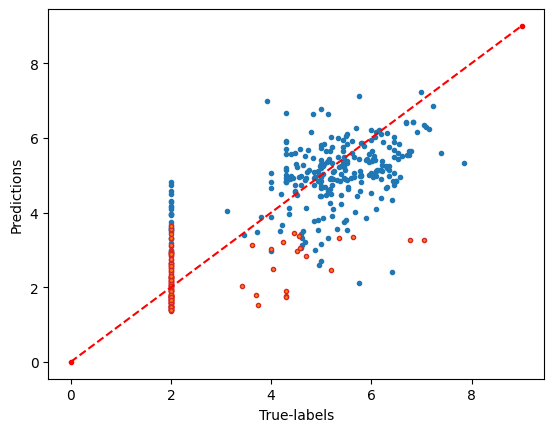

In [108]:
lower = [0., 9.]
upper = [0., 9.]
if flag=='class':
    plt.plot(lower,upper,"r--", marker='.' )
    # plt.plot([6,6], [0,9], "g--", marker='.')
    # plt.plot([0,9], [6,6], "g--", marker='.')
    plt.scatter( positives[:,1], positives[:,0], edgecolors='tab:blue', marker=".")
    plt.scatter( negatives[:,1], negatives[:,0], edgecolors='tab:red', marker=".")
    plt.xlabel('True-labels')
    plt.ylabel('Predictions')
    plt.show()
else:
    plt.plot(lower,upper,"r--", marker='.' )
    plt.plot([6,6], [0,9], "g--", marker='.')
    # plt.plot([0,9], [6,6], "g--", marker='.')
    plt.scatter( results[:,1], results[:,0], edgecolors='tab:blue', marker=".")
    plt.xlabel('True-labels')
    plt.ylabel('Predictions')
    plt.show()

In [86]:

# results = positives
dict_results = {'rmse': math.sqrt(mean_squared_error(y_true=results[:,1], y_pred=results[:,0])),
                'MAE':mean_absolute_error(results[:,1], results[:,0]),
                'r2_score': r2_score(results[:,1], results[:,0]),
                'pearson_r': stats.pearsonr(x=results[:,0], y=results[:,1].reshape(-1))[0],
                'spearman_r': stats.spearmanr(results[:,0], results[:,1].reshape(-1))[0],
            }
print(dict_results)

{'rmse': 1.473860831179345, 'MAE': 1.0474870420844424, 'r2_score': 0.5312544063118478, 'pearson_r': 0.7501514390773689, 'spearman_r': 0.7306823806575093}


In [87]:
def calculate_accuracy(results):
    count = 0
    for _, value in results.items():
        if value['class'][0] == value['class'][1]:
            count+=1
        
    print(count/len(results) * 100)

calculate_accuracy(data)

85.18987341772151


In [43]:
# precision recall
import numpy as np
wp_results = []
rp_results = []
class_thresh = 0.5

for _,value in avg_compound_ids.items():
        if value['class'][0] == 0 and value['class'][1] == 0:
                rp_results.append(value['class'])
        else:
                wp_results.append(value['class'])

wp_results = np.stack(wp_results)
rp_results = np.stack(rp_results)
print(wp_results.shape)
print(rp_results.shape)


(255, 2)
(144, 2)


In [44]:
total_trues =[list(value['affn']) for _,value in avg_compound_ids.items() if value['class'][0]==1]
total_falses = [list(value['affn']) for _,value in avg_compound_ids.items() if value['class'][0]==0]

In [13]:
print(total_trues)

[[5.5970162630081175, 5.954694747924805], [5.269802761077881, 5.031517028808594], [5.723482155799866, 5.34103536605835], [5.72094624042511, 6.102373123168945], [6.062726283073426, 5.455932140350342], [6.531447124481201, 6.199970722198486], [5.318695378303528, 5.180456161499023], [5.972920703887939, 5.7695512771606445], [5.833552813529968, 5.0], [5.663454818725586, 4.486782550811768], [4.1480472683906555, 4.301030158996582], [6.189655232429504, 6.154282093048096], [4.942552518844605, 3.7980568408966064], [4.98531448841095, 5.7695512771606445], [5.278157258033753, 5.962573528289795], [6.546855902671814, 6.79587984085083], [5.57746319770813, 6.346787452697754], [5.134282326698303, 5.79587984085083], [5.669923043251037, 6.221848964691162], [6.820115971565246, 6.552842140197754], [5.6580781698226925, 5.0], [5.477854800224304, 5.0], [5.91325159072876, 6.01436185836792], [6.845817041397095, 6.455932140350342], [5.836082887649536, 4.850780963897705], [5.11780104637146, 5.102373123168945], [5.6

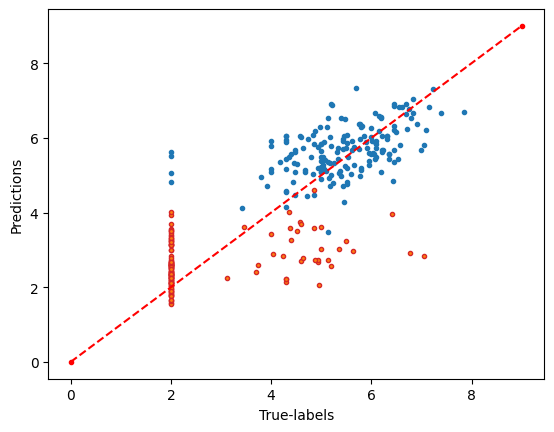

In [14]:
lower = [0., 9.]
upper = [0., 9.]
plt.plot(lower,upper,"r--", marker='.' )
# plt.plot([6,6], [0,9], "g--", marker='.')
# plt.plot([0,9], [6,6], "g--", marker='.')
plt.scatter( np.asarray(total_trues)[:,1], np.asarray(total_trues)[:,0], edgecolors='tab:blue', marker=".")
plt.scatter( np.asarray(total_falses)[:,1], np.asarray(total_falses)[:,0], edgecolors='tab:red', marker=".")
plt.xlabel('True-labels')
plt.ylabel('Predictions')
plt.show()

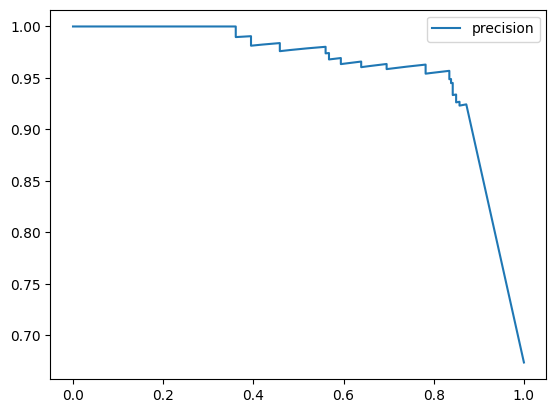

In [15]:
from sklearn.metrics import precision_recall_curve
classes_2 = np.asarray([student['class'] for _, student in avg_compound_ids.items()])
exp_results = []
for _, value in avg_compound_ids.items():
    if value['class'][0] ==0:
        exp_results.append([2.,value['affn'][1]])
    else:
        exp_results.append(value['affn'])

exp_results_2 = np.asarray(exp_results)

scaler = MinMaxScaler(feature_range=(0, 1))
y_scores_scaled_2 = scaler.fit_transform(exp_results_2[:,0].reshape(-1,1))
precisions_2, recalls_2, thresholds_2 = precision_recall_curve(
    classes_2[:, 1], y_scores_scaled_2
)
plt.plot(recalls_2, precisions_2, label='precision')
plt.legend()
plt.show()



In [16]:
dir = "/p/lustre1/ranganath2/fast.tmp/DENV2/EGNN-20250514-132745-9052-asd9pr1z"
os.chdir(os.path.join(dir, "denv2_test"))

with open('predictions.json') as f:
    data_0 = json.load(f)


avg_compound_ids_0 = avg_affinity(data_0, 'class')
classes_0= np.asarray([student['class'] for _, student in avg_compound_ids_0.items()])
exp_results_0 = []
for _, value in avg_compound_ids_0.items():
    if value['class'][0] ==0:
        exp_results_0.append([0.,value['affn'][1]])
    else:
        exp_results_0.append(value['affn'])

exp_results_0 = np.asarray(exp_results_0)


y_scores_scaled_0 = scaler.fit_transform(exp_results_0[:,0].reshape(-1,1))
precisions_0, recalls_0, thresholds_0 = precision_recall_curve(
    classes_0[:, 1], y_scores_scaled_0
)

calculate_accuracy(data_0)


67.0253164556962


In [17]:
dir = "/p/vast1/ranganath2/fast.tmp/DENV2/EGNN-20250305-110818-CPU-f448x66n-AFFINITY-1"
os.chdir(os.path.join(dir, "denv2_test"))

with open('predictions.json') as f:
    data_1 = json.load(f)

avg_compound_ids_1 = avg_affinity(data_1, 'class')

classes_1= np.asarray([student['class'] for _, student in avg_compound_ids_1.items()])
exp_results_1 = []
for _, value in avg_compound_ids_1.items():
    if value['class'][0] ==0:
        exp_results_1.append([1.,value['affn'][1]])
    else:
        exp_results_1.append(value['affn'])

exp_results_1 = np.asarray(exp_results_1)


y_scores_scaled_1 = scaler.fit_transform(exp_results_1[:,0].reshape(-1,1))
precisions_1, recalls_1, thresholds_1 = precision_recall_curve(
    classes_1[:, 1], y_scores_scaled_1
)

calculate_accuracy(data_1)

76.27848101265823


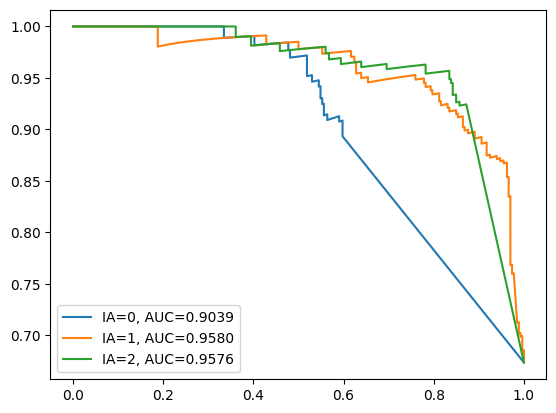

In [18]:


auc0 = auc(recalls_0, precisions_0)
auc1 = auc(recalls_1, precisions_1)
auc2 = auc(recalls_2, precisions_2)

plt.plot(recalls_0, precisions_0, label='IA=0, AUC={:.4f}'.format(auc0))
plt.plot(recalls_1, precisions_1, label= 'IA=1, AUC={:.4f}'.format(auc1))
plt.plot(recalls_2, precisions_2, label='IA=2, AUC={:.4f}'.format(auc2))


plt.legend()
plt.show()

In [19]:
exp_results = []
for _, value in avg_compound_ids.items():
    if value['class'][0] ==0:
        exp_results.append([2.,value['affn'][1]])
    else:
        exp_results.append(value['affn'])

exp_results = np.asarray(exp_results)

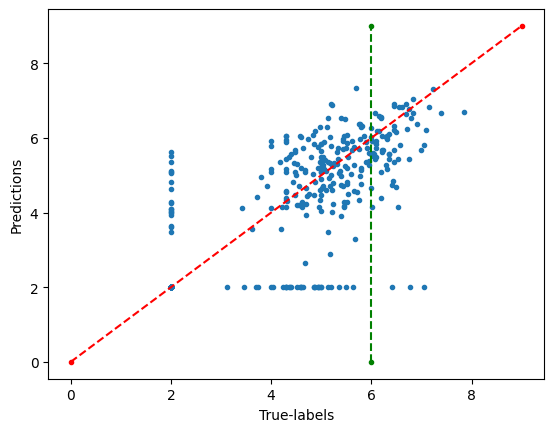

In [20]:
lower = [0., 9.]
upper = [0., 9.]
plt.plot(lower,upper,"r--", marker='.' )
plt.plot([6,6], [0,9], "g--", marker='.')
# plt.plot([0,9], [6,6], "g--", marker='.')
plt.scatter( exp_results[:,1], exp_results[:,0], edgecolors='tab:blue', marker=".")
plt.xlabel('True-labels')
plt.ylabel('Predictions')
plt.show()

In [21]:
print(exp_results.shape)

(395, 2)


In [22]:

scaler = MinMaxScaler(feature_range=(0, 1))
y_scores_scaled = scaler.fit_transform(exp_results[:,0].reshape(-1,1))
precision_c0, recall_c0, _ = precision_recall_curve(classes_0[:, 1], classes_0[:,0])
precision_c1, recall_c1, _ = precision_recall_curve(classes_1[:, 1], classes_1[:,0])
precision_c2, recall_c2, _ = precision_recall_curve(classes_2[:, 1], classes_2[:,0])




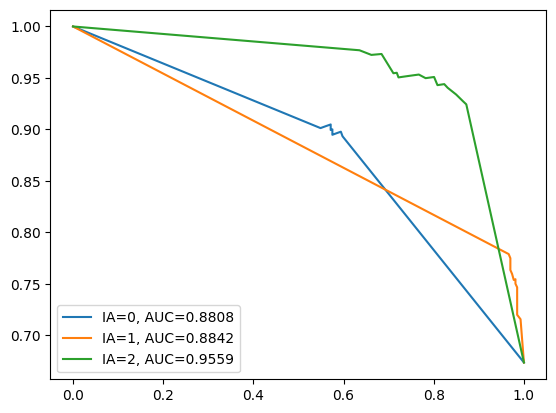

In [24]:
auc0 = auc(recall_c0, precision_c0)
auc1 = auc(recall_c1, precision_c1)
auc2 = auc(recall_c2, precision_c2)


plt.plot(recall_c0, precision_c0, label='IA=0, AUC={:.4f}'.format(auc0))
plt.plot(recall_c1, precision_c1, label='IA=1, AUC={:.4f}'.format(auc1))
plt.plot(recall_c2, precision_c2, label='IA=2, AUC={:.4f}'.format(auc2))
plt.legend()
plt.show()

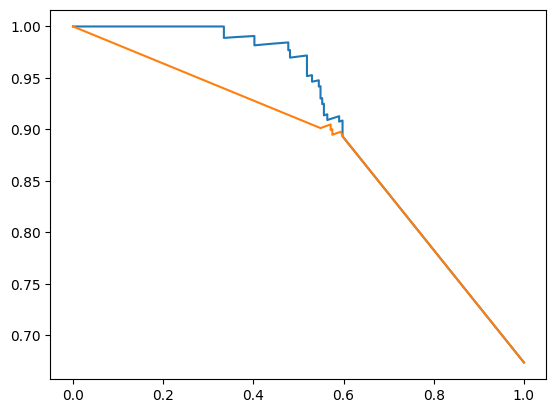

In [24]:
plt.plot(recalls_0, precisions_0, label='class + regression')
plt.plot(recall_c0, precision_c0, label='class only')
plt.show()

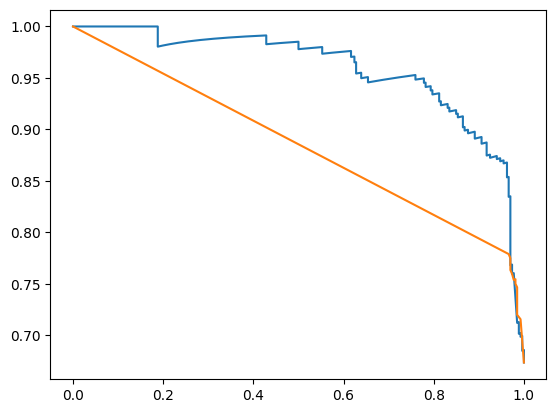

In [25]:
plt.plot(recalls_1, precisions_1, label='class + regression')
plt.plot(recall_c1, precision_c1, label='class only')
plt.show()

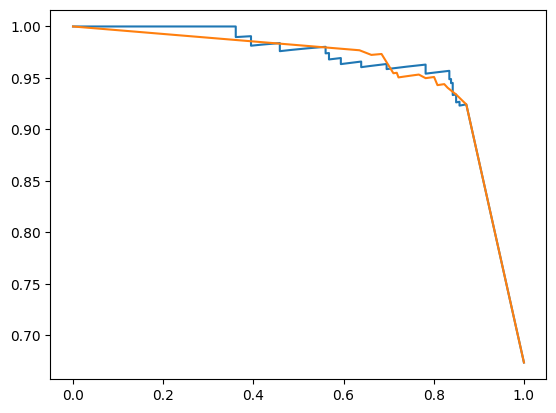

In [26]:
plt.plot(recalls_2, precisions_2, label='class + regression')
plt.plot(recall_c2, precision_c2, label='class only')
plt.show()